# OLA 4 - Cat or Dog?

### Importing Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

### Data Ingestion

In [2]:
DIRECTORY = "./data/"
CATEGORIES = ["cats", "dogs"]

# Specifying the directory path to the data images as well as resizing:
IMG_SIZE = 150
data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    
    # Index of labels
    label = CATEGORIES.index(category)
    
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        
        # 150 x 150
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        
        # Image with corresponding label to indicate whether it's a cat or dog.
        data.append([img_arr, label])
        
        #plt.imshow(img_arr)
        #break

In [3]:
len(data)

2000

In [4]:
# Shuffling the data between cats and dogs
random.shuffle(data)

### Data Transformation

In [5]:
X = []
y = []

for features, labels in data:
    X.append(features)
    y.append(labels)

# Converting to numpy:
X = np.array(X)
y = np.array(y)

In [6]:
# Normalizing the data
X = X/255

In [7]:
X

array([[[[0.        , 0.00784314, 0.01176471],
         [0.        , 0.00392157, 0.00784314],
         [0.00392157, 0.01176471, 0.01568627],
         ...,
         [0.35294118, 0.40784314, 0.49803922],
         [0.35294118, 0.40784314, 0.49803922],
         [0.35294118, 0.40784314, 0.49803922]],

        [[0.        , 0.00784314, 0.01176471],
         [0.        , 0.00392157, 0.00784314],
         [0.00392157, 0.01176471, 0.01568627],
         ...,
         [0.36078431, 0.41568627, 0.50588235],
         [0.35294118, 0.40784314, 0.49803922],
         [0.35294118, 0.40784314, 0.49803922]],

        [[0.00392157, 0.01176471, 0.01568627],
         [0.        , 0.00392157, 0.00784314],
         [0.        , 0.00392157, 0.00392157],
         ...,
         [0.36078431, 0.41176471, 0.50196078],
         [0.36078431, 0.41568627, 0.50588235],
         [0.35686275, 0.41568627, 0.50196078]],

        ...,

        [[0.49803922, 0.54901961, 0.71372549],
         [0.49019608, 0.59215686, 0.70980392]

### Building the Model

In [8]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.callbacks import Callback # type: ignore

In [9]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation="relu"))

model.add(Dense(128, activation="relu"))

model.add(Dense(2, activation="sigmoid"))

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# binary_crossentropy          

### Training the Model

In [11]:
'''
Total images: 2000
Validation Split: 10% = 200
Training: 90% = 1800
Batch Size: 32
Calculating Number of Batches: batches = 1800 / 32 ~ 56.25 = 57 rounded up
'''
history = model.fit(X, y, epochs=10, validation_split=0.1, batch_size=32)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.5315 - loss: 0.7631 - val_accuracy: 0.5450 - val_loss: 0.6900
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - accuracy: 0.5152 - loss: 0.6932 - val_accuracy: 0.5350 - val_loss: 0.6903
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - accuracy: 0.5672 - loss: 0.6749 - val_accuracy: 0.6050 - val_loss: 0.6695
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.6106 - loss: 0.6629 - val_accuracy: 0.5400 - val_loss: 0.6806
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 152ms/step - accuracy: 0.6016 - loss: 0.6622 - val_accuracy: 0.6650 - val_loss: 0.6216
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 156ms/step - accuracy: 0.6810 - loss: 0.6060 - val_accuracy: 0.6250 - val_loss: 0.6510
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 153ms/step - accuracy: 0.6872 - loss: 0.5766 - val_accuracy: 0.6250 - val_loss: 0.6611
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - accuracy: 0.7788 - loss: 0.4654 - val_accuracy: 0

In [12]:
accuracy      = history.history['accuracy']
val_accuracy  = history.history['val_accuracy']
loss          = history.history['loss']
val_loss      = history.history['val_loss']

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


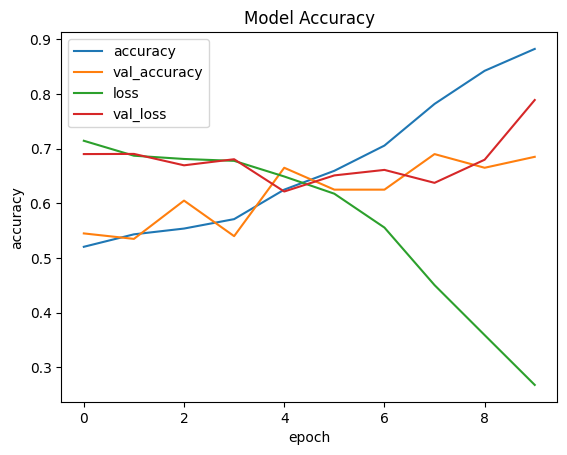

In [13]:
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.plot(loss)
plt.plot(val_loss)

plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["accuracy", "val_accuracy", "loss", "val_loss"])
print(history.history.keys())
plt.show()

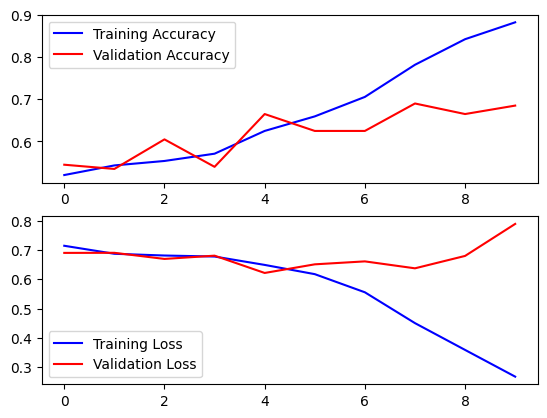

In [14]:
fig, ax = plt.subplots(2, 1)

ax[0].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[0].plot(history.history['val_accuracy'], color='r', label="Validation Accuracy")
ax[0].legend(loc='best')

ax[1].plot(history.history['loss'], color='b', label="Training Loss")
ax[1].plot(history.history['val_loss'], color='r', label="Validation Loss")
ax[1].legend(loc='best')

### Validating the Model

In [15]:
from tensorflow.keras.preprocessing import image # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)  

test_generator = test_datagen.flow_from_directory(
    './data',  
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=1,
    class_mode='binary',
    shuffle=False  
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Found 2000 images belonging to 2 classes.
  61/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8901 - loss: 0.1961  

c:\Users\chris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9180 - loss: 0.2166
Test Loss: 0.3189660310745239
Test Accuracy: 0.8644999861717224


### Testing the Model with Unlabeled Data

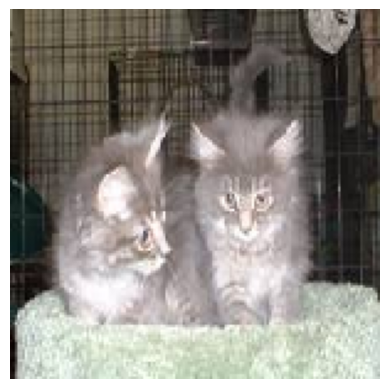

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
This is a cat


In [17]:
def load_random_image(base_dir, show=False):
    category = random.choice(CATEGORIES)
    category_path = os.path.join(base_dir, category)
    
    random_image_file = random.choice(os.listdir(category_path))
    img_path = os.path.join(category_path, random_image_file)
    

    img = image.load_img(img_path, target_size=(IMG_SIZE,IMG_SIZE))
    img_tensor = image.img_to_array(img) 
    img_tensor = np.expand_dims(img_tensor, axis=0)  
    img_tensor /= 255.  
    
    if show:
        plt.imshow(img_tensor[0])    
        plt.axis('off')
        plt.show()
    
    return img_tensor

base_dir = './data'  

new_image = load_random_image(base_dir, show=True)

prediction = model.predict(new_image)
print("This is a", "cat" if prediction[0][0] > 0.5 else "dog")

### Based on your experience, how would you define ANN and CNN?

* ANN (Artificial Neural Network): ANNs are a type of artificial intelligence algorithm inspired by the structure and functioning of the human brain. They consist of layers of interconnected nodes or neurons, where each connection can transmit a signal from one neuron to another. The receiving neuron processes the signal and signals downstream neurons connected to it. ANNs are capable of learning and modeling complex patterns in data by adjusting the weights of connections, which are adjusted during the training process based on the data.

* CNN (Convolutional Neural Network): CNNs are a specialized kind of neural network used primarily for processing structured grid data such as images. CNNs utilize a mathematical operation called convolution which involves a convolutional filter that passes over the input data, creating feature maps that abstract the data's features. This makes CNNs highly effective for tasks like image recognition, as they reduce the amount of parameters and computations needed, and they can capture spatial hierarchies in data.

### Which hyper-parameters of the CNN architecture have you fine-tuned?

We have fine-tuned our CNN model by adjusting the following things:

* Learning rate
* Batch size
* Number of epochs
* Activation functions
* Loss functions



### Which is the role of the activation functions in ANN? Which of them you have implemented? Illustrate them.

Activation functions in artificial neural networks (ANNs) are critical because they introduce non-linearity into the network. This non-linearity allows the network to learn complex patterns in the data, which wouldn't be possible if the network were to only use linear transformations.

We have used both ReLU and Sigmoid in our project.

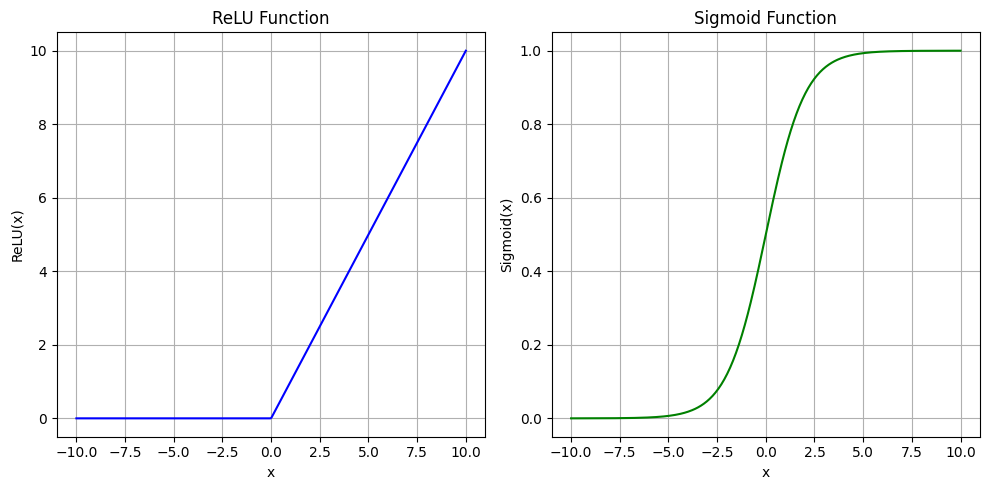

In [18]:
# Define the ReLU and Sigmoid functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of values from -10 to 10
x = np.linspace(-10, 10, 400)

# Apply ReLU and Sigmoid to these values
y_relu = relu(x)
y_sigmoid = sigmoid(x)

# Create the plot
plt.figure(figsize=(10, 5))

# Plotting ReLU
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(x, y_relu, label="ReLU", color='blue')
plt.title("ReLU Function")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("ReLU(x)")

# Plotting Sigmoid
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(x, y_sigmoid, label="Sigmoid", color='green')
plt.title("Sigmoid Function")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")

plt.tight_layout()
plt.show()


### Can you see any advantages and disadvantages of ANN and CNN used for classification in comparison to the other classification algorithms you are familiar with? Give some examples.

* **Advantages:**
    * **Feature Learning:** ANNs and CNNs have the ability to automatically learn and improve on their own by learning the features directly from the data without needing manual feature extraction.
    * **Adaptability:** They can be used across various types of data: images, audio, text, etc.

* **Disadvantages:** 
    * **Computational Intensity:** Both ANNs and CNNs require significant computational resources for training, particularly on large datasets.
    * **Overfitting:** Without proper regularization, they can easily overfit on the training data, especially if it's not diverse enough.
    * **Transparency:** These models are often considered "black boxes," meaning it is difficult to understand how exactly they are deriving conclusions.
    